<center><h2> Car Price Prediction </h2></center>

<center><img src='https://images.pexels.com/photos/1149137/pexels-photo-1149137.jpeg?auto=compress&cs=tinysrgb&dpr=1&w=500' width =800 height = 500</center>

## Table of Contents

#### [1.Introduction](#1)
#### [2.Variable Description](#2)
#### [3.Importing Libraries](#3)
#### [4.Basic Understanding the Dataaset](#4)
#### [5.Data Preprocessing](#5)
#### [6.Exploratory Data Analysis](#6)
#### [7.Conclusion](#7)

### Introduction<a id=1></a>

The auto industry is changing rapidly and car prices are only going up. So to speak, new cars are getting costlier each year, making them a very high value purchase for the common man. And quite ironically, the average life span of a car is going down despite the steady rise in prices, which brings in good news for potential used car buyers! Thanks to manufacturers launching newer versions of their models sooner now as compared to a few years ago, more and more modern cars are now entering the used car market, which makes it easy for you to make a good buy without having to bust your wallet.

A used car in fact makes more sense for first time buyers upgrading from two-wheelers or public transportation, or for that matter, someone looking to buy a second set of wheels in the family. Now here’s five reasons clarifying why buying a used car instead of a new car is more sensible.

For this reason, in this project We have a dataset to predict price of second hand car using given variables. In the beginning, We will understand the dataset and make sense of it , clean the data if necessary and analyze, finally We built a few machine learning models and choose the best model. 

### Variable Description<a id=2></a>

- **Name** : The brand and model of the car
- **Location** :The location in which the car is being sold or is available for purchase.
- **Year** : The year or edition of the model.
- **Kilometers_Driven** : The total kilometres driven in the car by the previous owner(s) in KM.
- **Fuel_Type** : The type of fuel used by the car. (Petrol, Diesel, Electric, CNG, LPG)
- **Transmission** : The type of transmission used by the car. (Automatic / Manual)
- **Owner_Type** : First,Second,Third,Fourth or Above
- **Mileage** : The standard mileage offered by the car company in km/kg
- **Engine** : The displacement volume of the engine in CC.
- **New Price** : New Price.
- **Price** : Price.(lakh)

### Importing libraries<a id=3></a>

In [69]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style("whitegrid")

pd.options.display.max_columns = None
pd.options.display.max_rows = None

import warnings
warnings.filterwarnings("ignore")

### Basic Understanding the Dataset<a id=4></a>

In [70]:
df = pd.read_csv("train-data.csv")

In [71]:
df.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


#### Dropping Redundant Columns

In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
df.drop("Name",axis=1,inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Location           6019 non-null   object 
 1   Year               6019 non-null   int64  
 2   Kilometers_Driven  6019 non-null   int64  
 3   Fuel_Type          6019 non-null   object 
 4   Transmission       6019 non-null   object 
 5   Owner_Type         6019 non-null   object 
 6   Mileage            6017 non-null   object 
 7   Engine             5983 non-null   object 
 8   Power              5983 non-null   object 
 9   Seats              5977 non-null   float64
 10  New_Price          824 non-null    object 
 11  Price              6019 non-null   float64
dtypes: float64(2), int64(2), object(8)
memory usage: 564.4+ KB


In [7]:
df.describe()

,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,2013.358199,5.873838e+04,5.278735,9.479468
std,3.269742,9.126884e+04,0.808840,11.187917
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2011.000000,3.400000e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.640000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


- Max price number seems outlier compared to 3Q (75% Quantile)

### Data Preprocessing<a id=5></a>

#### Checking Missing Values

In [8]:
df.isnull().sum()

Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
dtype: int64

- "New Price " column has many missing values . It will not be usefull for further analysis and model building.Hence I will delete the New_Price column.

In [9]:
df.drop("New_Price",axis=1,inplace=True)

### Dropping Missing Values

In [10]:
df.dropna(inplace=True)

In [11]:
df.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
dtype: int64

#### "Mileage"

In [12]:
df.Mileage = df.Mileage.apply(lambda x: x.split(" ")[0])

In [13]:
df.Mileage = df.Mileage.astype("float")

### "Engine"

In [14]:
df.Engine = df.Engine.apply(lambda x : x.split(" ")[0])

In [15]:
df.Engine = df.Engine.astype("int64")

### "Power"

In [16]:
df.Power = df.Power.apply(lambda x: x.split(" ")[0])

In [17]:
df.Power.replace("null",np.nan,inplace=True)

In [18]:
df.Power.fillna("74",inplace=True)

In [19]:
df.Power = df.Power.astype("float")

In [20]:
df.dtypes

Location              object
Year                   int64
Kilometers_Driven      int64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine                 int64
Power                float64
Seats                float64
Price                float64
dtype: object

In [21]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Coimbatore,2013,40670,Diesel,Automatic,Second,15.20,1968,140.80,5.0,17.74


## Exploratory Data Analysis<a id=6></a>

### Univariate Analysis

#### Numerical Data Analysis

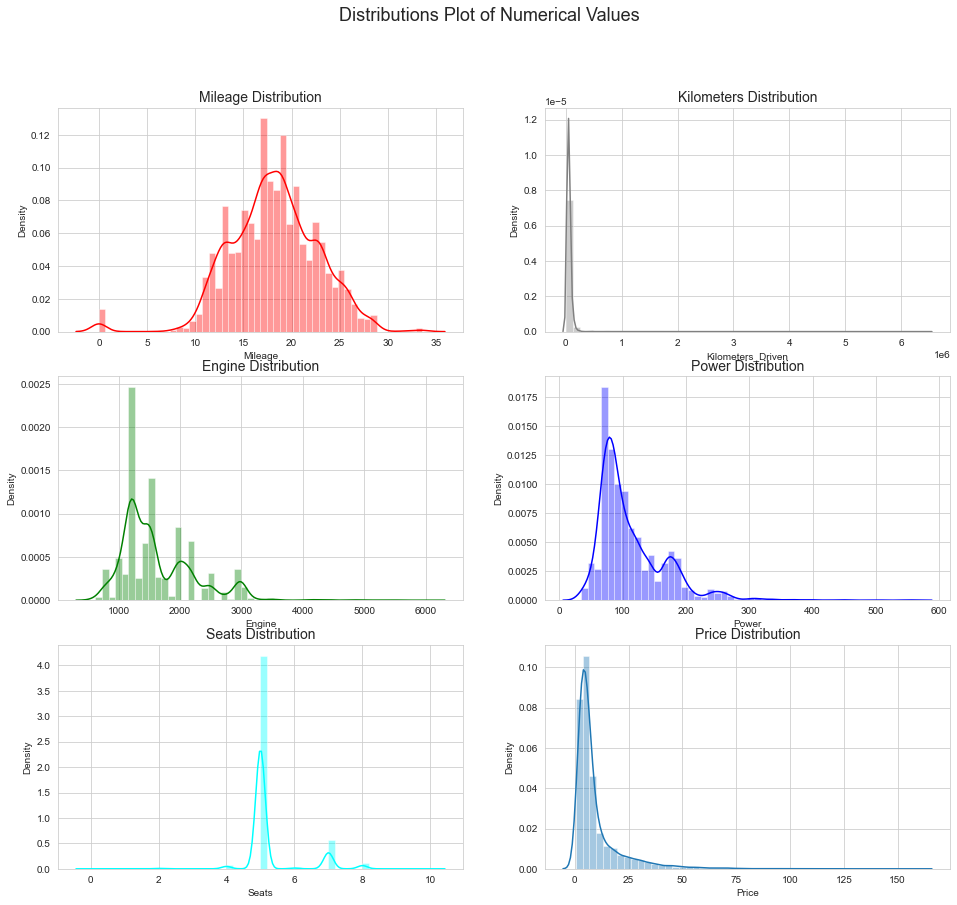

In [22]:
fig, axes = plt.subplots(3,2,figsize=(16,14))
fig.suptitle('Distributions Plot of Numerical Values',fontsize=(18))
sns.distplot(df.Mileage,ax=axes[0,0],color="r").set_title("Mileage Distribution",fontsize=14)
sns.distplot(df.Kilometers_Driven,ax=axes[0,1],color="gray").set_title("Kilometers Distribution",fontsize=14)
sns.distplot(df.Engine,ax=axes[1,0],color="g").set_title("Engine Distribution",fontsize=14)
sns.distplot(df.Power,ax=axes[1,1],color="b").set_title("Power Distribution",fontsize=14)
sns.distplot(df.Seats,ax=axes[2,0],color="cyan").set_title("Seats Distribution",fontsize=14)
sns.distplot(df.Price,ax=axes[2,1]).set_title("Price Distribution",fontsize=14)
plt.show()

### Insights 

-  Mileage seems normal distributed. There are anomalies value called 0 it refers to null values.
-  Kilometers is right skewed data.
-  Engine variable also has anomalies.
-  Power distributed right
-  Price is also positivly skewed.

### Handling Outliers

#### "Mileage"

In [23]:
df.Mileage.mean()

18.179407531380754

In [24]:
df.Mileage.replace(0,15,inplace=True)

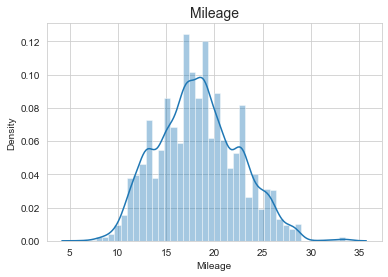

In [25]:
sns.distplot(df.Mileage)
plt.title("Mileage",fontsize=14)
plt.show()

#### "Kilometers"

In [26]:
Q1 = df.Kilometers_Driven.quantile(0.25)
Q3 = df.Kilometers_Driven.quantile(0.75)
IQR = Q3-Q1

In [27]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [28]:
df = df[~((df.Kilometers_Driven<lower_limit) | (df.Kilometers_Driven > upper_limit))]

In [29]:
print(df.shape[0])

5774


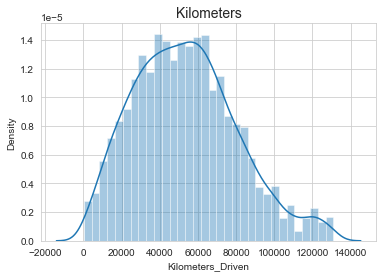

In [30]:
sns.distplot(df.Kilometers_Driven)
plt.title("Kilometers",fontsize=14)
plt.show()

#### "Engine"

In [31]:
Q1 = df.Engine.quantile(0.25)
Q3 = df.Engine.quantile(0.75)
IQR = Q3-Q1

In [32]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [33]:
df = df[~((df.Engine<lower_limit) | (df.Engine > upper_limit))]

In [34]:
print(df.shape[0])

5714


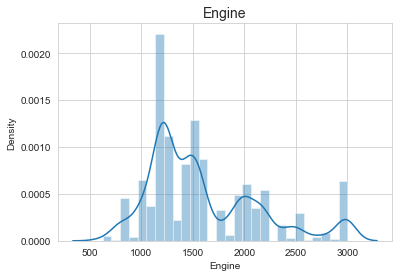

In [35]:
sns.distplot(df.Engine)
plt.title("Engine",fontsize=14)
plt.show()

#### "Power Distribution"

In [36]:
Q1 = df.Power.quantile(0.25)
Q3 = df.Power.quantile(0.75)
IQR = Q3-Q1

In [37]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [38]:
df = df[~((df.Power<lower_limit) | (df.Power > upper_limit))]

In [39]:
print(df.shape[0])

5521


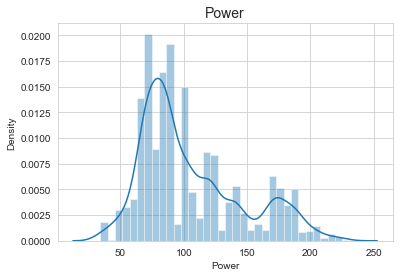

In [40]:
sns.distplot(df.Power)
plt.title("Power",fontsize=14)
plt.show()

#### "Price"

In [41]:
Q1 = df.Price.quantile(0.25)
Q3 = df.Price.quantile(0.75)
IQR = Q3-Q1

In [42]:
lower_limit = Q1-1.5*IQR
upper_limit = Q3 + 1.5*IQR

In [43]:
df = df[~((df.Price<lower_limit) | (df.Price > upper_limit))]

In [44]:
print(df.shape[0])

4902


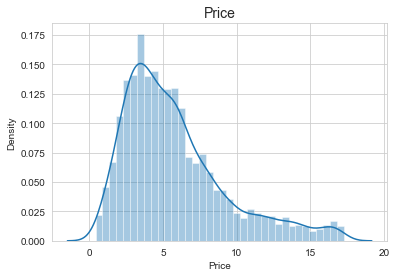

In [45]:
sns.distplot(df.Price)
plt.title("Price",fontsize=14)
plt.show()

#### We dropped outliers using IQR method. Now continuous values seem Normal Distributed.

### Categorical Values

In [46]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50
2,Chennai,2011,46000,Petrol,Manual,First,18.20,1199,88.70,5.0,4.50
3,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
5,Hyderabad,2012,75000,LPG,Manual,First,21.10,814,55.20,5.0,2.35


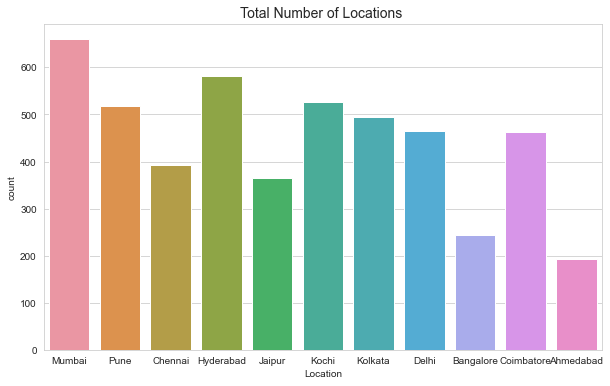

In [47]:
plt.figure(figsize=(10,6))
sns.countplot(df.Location)
plt.title("Total Number of Locations ",fontsize=14)
plt.show()

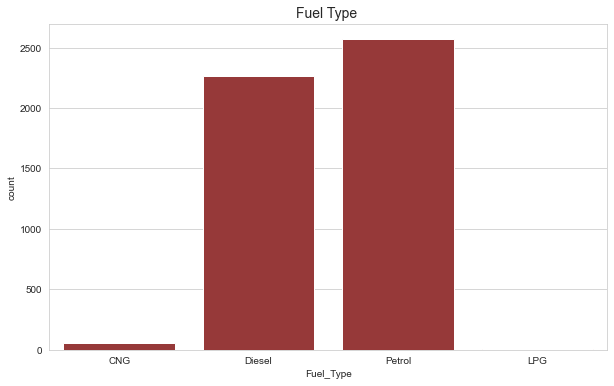

In [48]:
plt.figure(figsize=(10,6))
sns.countplot(df.Fuel_Type,color="Brown")
plt.title("Fuel Type ",fontsize=14)
plt.show()

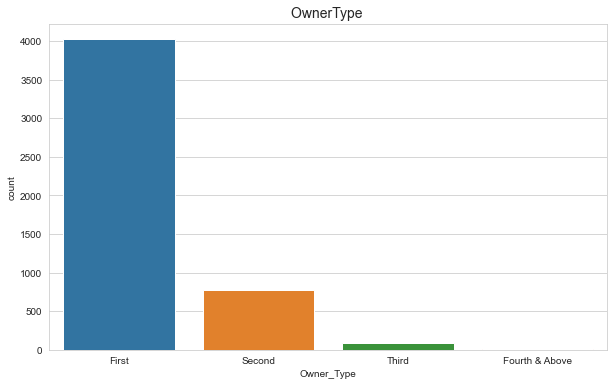

In [49]:
plt.figure(figsize=(10,6))
sns.countplot(df.Owner_Type)
plt.title("OwnerType ",fontsize=14)
plt.show()

### Car Price by OwnerType

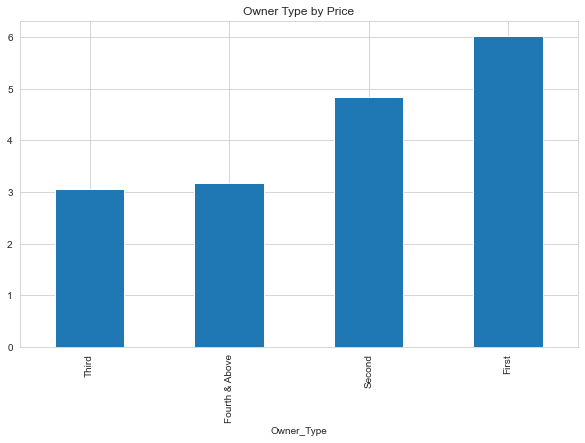

In [50]:
df_owner_price = df.groupby("Owner_Type")["Price"].mean().sort_values().plot(kind="bar",figsize=(10,6)).set_title("Owner Type by Price")


### Bivariate Analysis

### Scatter Plots

#### - Scatter plot is a plot that compares numerical - numerical values.
#### - We will try to find if independent values have relationship with Price variable

In [51]:
df.head(2)

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Mumbai,2010,72000,CNG,Manual,First,26.60,998,58.16,5.0,1.75
1,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.20,5.0,12.50


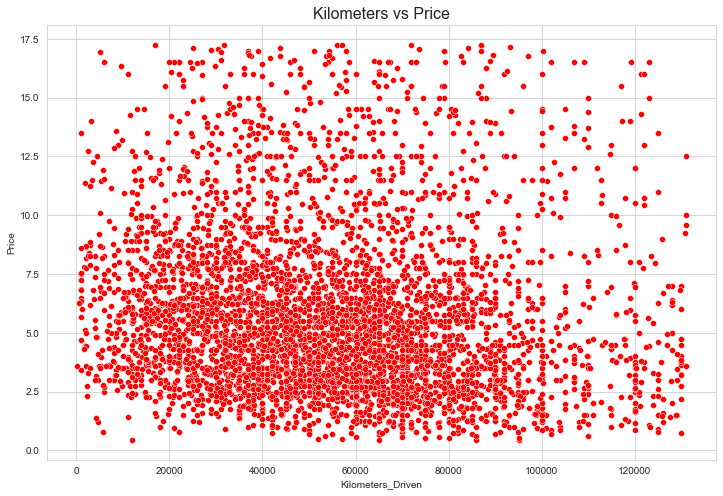

In [52]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Kilometers_Driven",y="Price",data=df,color="r")
plt.title("Kilometers vs Price",fontsize=16)
plt.show()

- There is no relationship between "Kilometers" and "Price"

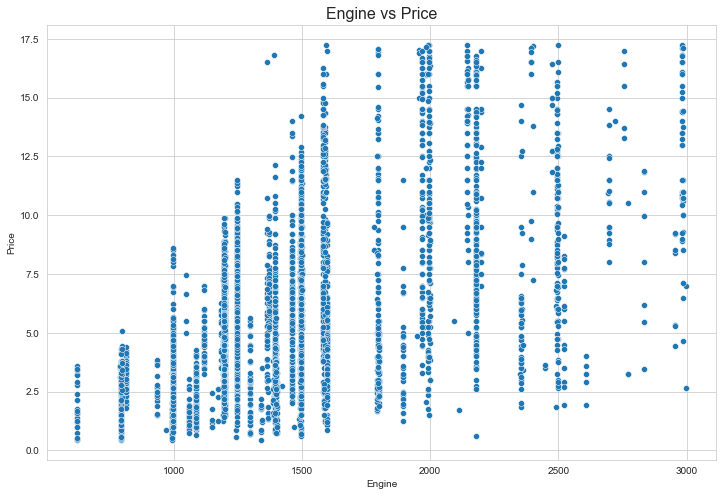

In [53]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Engine",y="Price",data=df)
plt.title("Engine vs Price",fontsize=16)
plt.show()

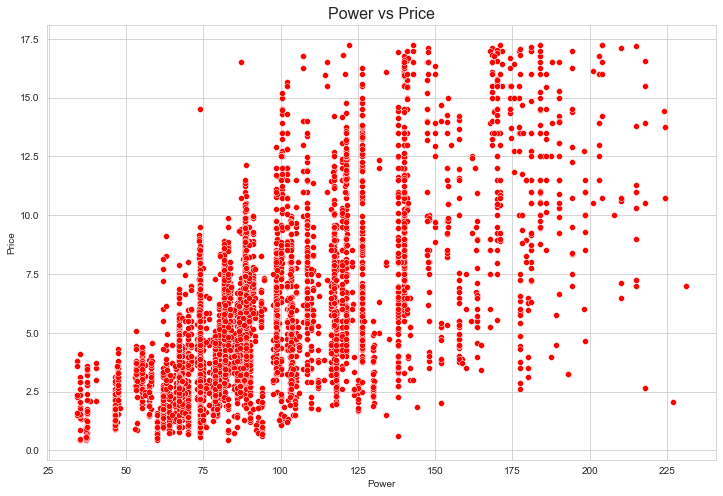

In [54]:
plt.figure(figsize=(12,8))
sns.scatterplot(x="Power",y="Price",data=df,color="r")
plt.title("Power vs Price",fontsize=16)
plt.show()

### Categorical vs Numerical

### Year vs Price

In [55]:
df_year_price= df.groupby("Year")["Price"].mean().to_frame()

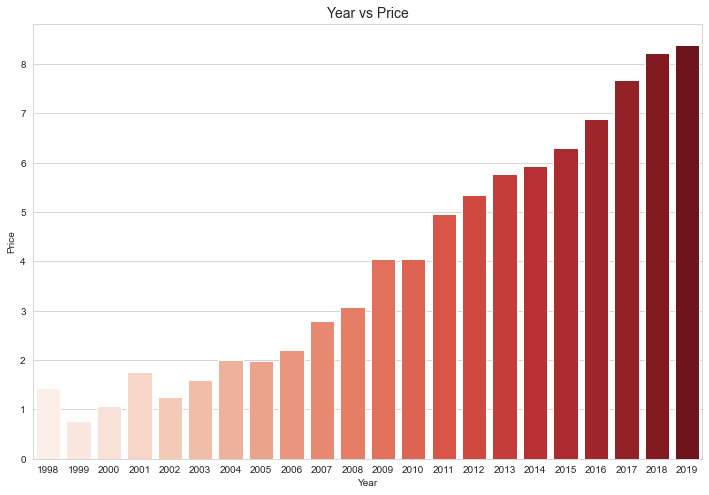

In [56]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_year_price,x=df_year_price.index,y=df_year_price.Price,palette="Reds")
plt.title("Year vs Price",fontsize=14)
plt.show()

### Location vs Price

In [57]:
df_location_price= df.groupby("Location")["Price"].mean().to_frame()

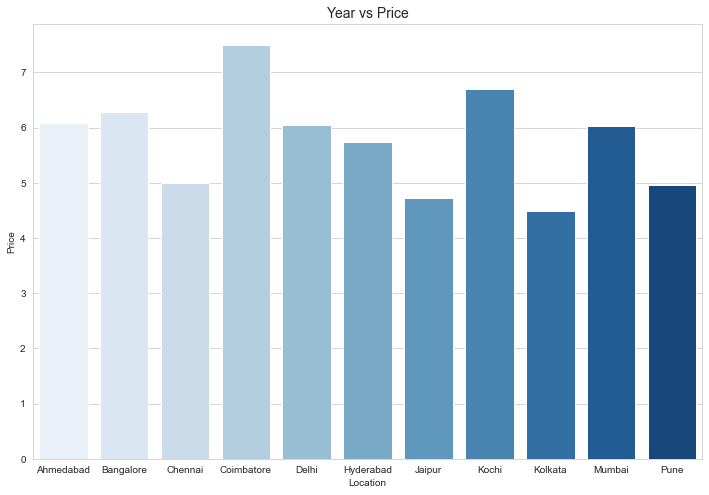

In [58]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_location_price,x=df_location_price.index,y=df_location_price.Price,palette="Blues")
plt.title("Year vs Price",fontsize=14)
plt.show()

### FuelType vs Price

In [59]:
df_fueltype_price= df.groupby("Fuel_Type")["Price"].mean().to_frame()

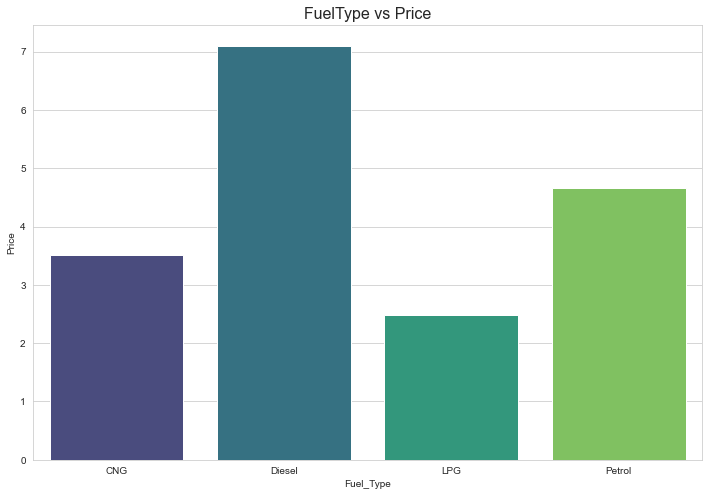

In [60]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_location_price,x=df_fueltype_price.index,y=df_fueltype_price.Price,palette="viridis")
plt.title("FuelType vs Price",fontsize=16)
plt.show()

#### Diesel automotive is the most expensive compared to other fuel types.

### Transmission vs Price

In [61]:
df_transmission_price= df.groupby("Transmission")["Price"].mean().to_frame()

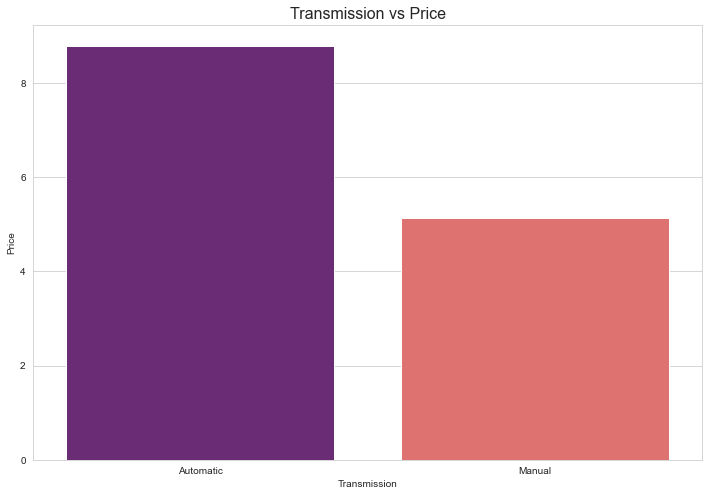

In [62]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_transmission_price,x=df_transmission_price.index,y=df_transmission_price.Price,palette="magma")
plt.title("Transmission vs Price",fontsize=16)
plt.show()

#### Automatic car is more expensive than manual

### Owner Type vs Price

In [63]:
df_ownertype_price= df.groupby("Owner_Type")["Price"].mean().to_frame()

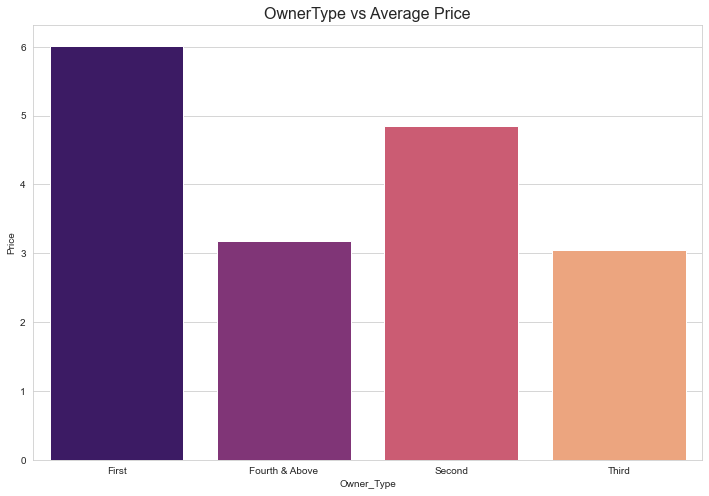

In [64]:
plt.figure(figsize=(12,8))
sns.barplot(data=df_ownertype_price,x=df_ownertype_price.index,y=df_ownertype_price.Price,palette="magma")
plt.title("OwnerType vs Average Price",fontsize=16)
plt.show()

- Cars from First Owners is higher price whereas Third Owner is the slightly lower than Fourth Owners.

### Multivariate Analysis

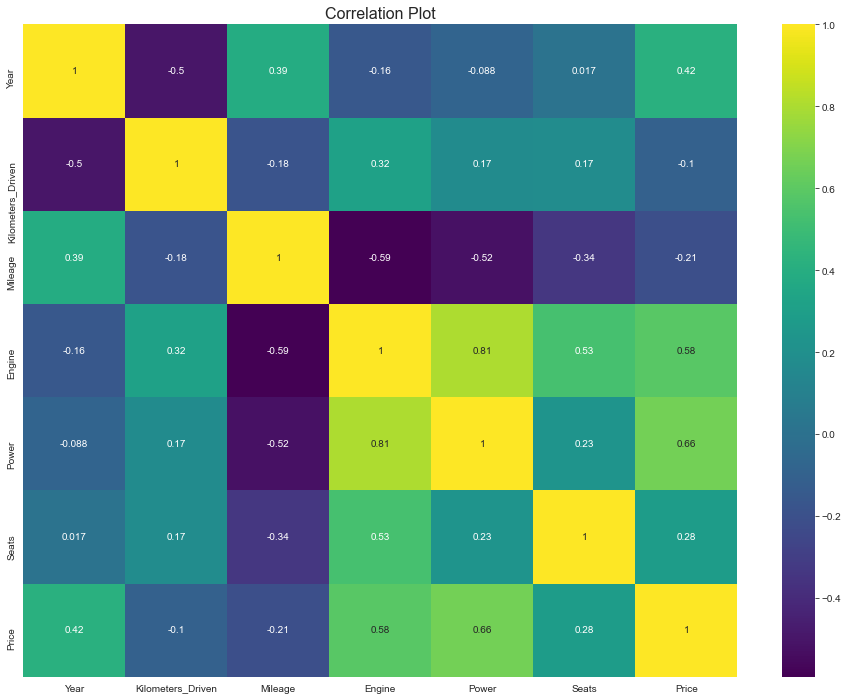

In [65]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True,cmap="viridis")
plt.title("Correlation Plot",fontsize=16)
plt.show()

## Conclusion <a id=7></a>

- Price is highly positively correlated with Year,Engine,Power
- Price is also negatively correlated with Mileage
#### There are some multicollinearity problem in our dataset ;
- Engine is highly correlated with Power **0.81** : We can say that when Engine number is increased Power is also increased and vice versa..
- Engine is also highly correlated with Seats **0.53** : When Engine increases , Number of seats also increase.

### Saving Cleaned Data

In [67]:
df.to_csv('cleaned_data.csv')